# Spotify - Creating Cohorts of Songs
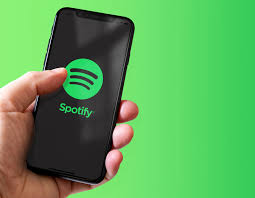

# Project  Scenario:
The customer always looks forward to specialized treatment, whether shopping on
an e-commerce website or watching Netflix. The customer desires content that
aligns with their preferences. To maintain customer engagement, companies must
consistently provide the most relevant information.
Starting with Spotify, a Swedish audio streaming and media service provider, boasts
over 456 million active monthly users, including more than 195 million paid
subscribers as of September 2022. The company aims to create cohorts of different
songs to enhance song recommendations. These cohorts will be based on various
relevant features, ensuring that each group contains similar types of songs.

# Project Objective:
- Perform exploratory data analysis and cluster analysis to create cohorts of songs. The goal is to better understand the various factors that create a cohort of songs.

# Data Description:
The dataset comprises information from Spotify's API regarding all albums by the
Rolling Stones available on Spotify. It's crucial to highlight that each song possesses
a unique ID.

#  <span style="color:lightgreen"> Step1 : Initial data inspection and data cleaning </span>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('songs.csv')

In [3]:
df.head()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


In [4]:
df = df.drop(['Unnamed: 0'],axis=1)

In [5]:
df.shape

(1610, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1610 non-null   object 
 1   album             1610 non-null   object 
 2   release_date      1610 non-null   object 
 3   track_number      1610 non-null   int64  
 4   id                1610 non-null   object 
 5   uri               1610 non-null   object 
 6   acousticness      1610 non-null   float64
 7   danceability      1610 non-null   float64
 8   energy            1610 non-null   float64
 9   instrumentalness  1610 non-null   float64
 10  liveness          1610 non-null   float64
 11  loudness          1610 non-null   float64
 12  speechiness       1610 non-null   float64
 13  tempo             1610 non-null   float64
 14  valence           1610 non-null   float64
 15  popularity        1610 non-null   int64  
 16  duration_ms       1610 non-null   int64  


In [7]:
df.describe()

,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
count,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.00000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,8.613665,0.250475,0.468860,0.792352,0.164170,0.49173,-6.971615,0.069512,126.082033,0.582165,20.788199,257736.488199
std,6.560220,0.227397,0.141775,0.179886,0.276249,0.34910,2.994003,0.051631,29.233483,0.231253,12.426859,108333.474920
min,1.000000,0.000009,0.104000,0.141000,0.000000,0.02190,-24.408000,0.023200,46.525000,0.000000,0.000000,21000.000000
25%,4.000000,0.058350,0.362250,0.674000,0.000219,0.15300,-8.982500,0.036500,107.390750,0.404250,13.000000,190613.000000
50%,7.000000,0.183000,0.458000,0.848500,0.013750,0.37950,-6.523000,0.051200,124.404500,0.583000,20.000000,243093.000000
75%,11.000000,0.403750,0.578000,0.945000,0.179000,0.89375,-4.608750,0.086600,142.355750,0.778000,27.000000,295319.750000
max,47.000000,0.994000,0.887000,0.999000,0.996000,0.99800,-1.014000,0.624000,216.304000,0.974000,80.000000,981866.000000


In [8]:
from IPython.display import Markdown, display

In [9]:
# Initial inspection
print("---------------Info------------") 
print(df.info())
print("---------------Description------------") 
print("Description", df.describe())

---------------Info------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1610 non-null   object 
 1   album             1610 non-null   object 
 2   release_date      1610 non-null   object 
 3   track_number      1610 non-null   int64  
 4   id                1610 non-null   object 
 5   uri               1610 non-null   object 
 6   acousticness      1610 non-null   float64
 7   danceability      1610 non-null   float64
 8   energy            1610 non-null   float64
 9   instrumentalness  1610 non-null   float64
 10  liveness          1610 non-null   float64
 11  loudness          1610 non-null   float64
 12  speechiness       1610 non-null   float64
 13  tempo             1610 non-null   float64
 14  valence           1610 non-null   float64
 15  popularity        1610 non-null   int64  
 16  duration_m

In [10]:
df.head()

,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


#  <span style="color:lightgreen"> Step 2. Refine the data </span>

In [12]:
from sklearn.preprocessing import StandardScaler
from scipy import stats

# Analyse the data and check for outliers
numeric_cols = df.select_dtypes(include=['float64', 'int64']).drop('track_number', axis = 1).columns.tolist()
np.abs(stats.zscore(df[numeric_cols]) < 3).all(axis=1).value_counts()

True     1524
False      86
Name: count, dtype: int64

Observation: There are 86 outliers in data set

In [13]:
# Drop duplicate rows
df = df.drop_duplicates()

# Handle missing values
df = df.dropna()

# Convert release_date to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

# Extract year from release_date
df['release_year'] = df['release_date'].dt.year

# Normalize numerical features

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Remove outliers based on Z-score
df = df[(np.abs(stats.zscore(df[numeric_cols])) < 3).all(axis=1)]

# Create a feature for the decade of release
df['release_decade'] = (df['release_year'] // 10) * 10

# Ensure consistent capitalization for album names
df['album'] = df['album'].str.title()


In [14]:
df.describe()

,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,release_year,release_decade
count,1508,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000
mean,1992-01-16 12:50:36.604774528,8.696950,-0.022219,0.025699,0.015181,0.000492,-0.015994,0.038826,-0.082067,-0.014592,0.044189,-0.025387,-0.084570,1991.477454,1986.836870
min,1964-04-16 00:00:00,1.000000,-1.101790,-2.574310,-2.954748,-0.594467,-1.346251,-2.677645,-0.897261,-2.722281,-2.449447,-1.673364,-2.127829,1964.000000,1960.000000
25%,1970-09-04 00:00:00,4.000000,-0.855927,-0.711627,-0.652573,-0.593674,-0.968447,-0.660153,-0.641523,-0.639937,-0.715524,-0.626918,-0.628503,1970.000000,1970.000000
50%,1986-03-24 00:00:00,7.000000,-0.323213,-0.041343,0.287204,-0.544497,-0.357401,0.159740,-0.372223,-0.087052,0.068494,-0.063447,-0.159959,1986.000000,1980.000000
75%,2017-09-29 00:00:00,11.000000,0.653357,0.798275,0.854406,0.058227,1.138339,0.792702,0.263247,0.536297,0.869814,0.500024,0.320679,2017.000000,2010.000000
max,2022-06-10 00:00:00,47.000000,2.918824,2.950239,1.149129,2.957784,1.450668,1.990468,2.973682,2.982849,1.694926,2.995396,2.968763,2022.000000,2020.000000
std,NaN,6.633975,0.983045,0.998572,0.968489,1.002117,0.994965,0.927234,0.778145,0.992560,0.990758,0.924841,0.776128,22.406722,22.530844


In [15]:
df.head()

,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,release_year,release_decade
1,Street Fighting Man - Live,Licked Live In Nyc,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.820518,-1.007963,0.960062,0.249238,1.344648,0.724545,0.123753,0.183852,-1.142678,1.063495,-0.042138,2022,2020
2,Start Me Up - Live,Licked Live In Nyc,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.728140,-0.584626,0.982305,0.853953,1.330321,0.680109,0.881280,0.136323,-1.164306,1.063495,0.050079,2022,2020
3,If You Can't Rock Me - Live,Licked Live In Nyc,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,1.392383,-0.704571,1.071278,-0.594080,1.155532,0.479980,2.392459,0.236514,-1.882359,0.902504,0.444539,2022,2020
4,Don’t Stop - Live,Licked Live In Nyc,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.657756,-1.170242,0.982305,-0.392050,1.358975,0.625984,0.455050,0.152303,-1.627147,0.902504,0.437392,2022,2020
5,Monkey Man - Live,Licked Live In Nyc,2022-06-10,6,3ixZ1NQk5sqvBZgWeIdiqr,spotify:track:3ixZ1NQk5sqvBZgWeIdiqr,0.107886,-0.909184,0.910014,-0.141836,0.714260,0.478644,0.425989,-0.836768,-1.977522,0.822008,-0.124132,2022,2020


#  <span style="color:lightgreen"> Step 3 : Perform exploratory data analysis and feature engineering </span> 

## 1. Utilize suitable visualizations to identify the two albums that should be recommended to anyone based on the number of popular songs in each album

In [16]:
df.album.value_counts()

album
Honk (Deluxe)                       47
Voodoo Lounge Uncut (Live)          44
Some Girls (Deluxe Version)         44
Tattoo You (Super Deluxe)           44
Live Licks                          41
                                    ..
Black And Blue (Remastered 2009)     8
Aftermath                            7
Sticky Fingers (Remastered)          7
Black And Blue                       7
Jamming With Edward                  4
Name: count, Length: 88, dtype: int64

In [17]:
popular_ablums = df.groupby('album')['popularity'].mean().sort_values(ascending = False)

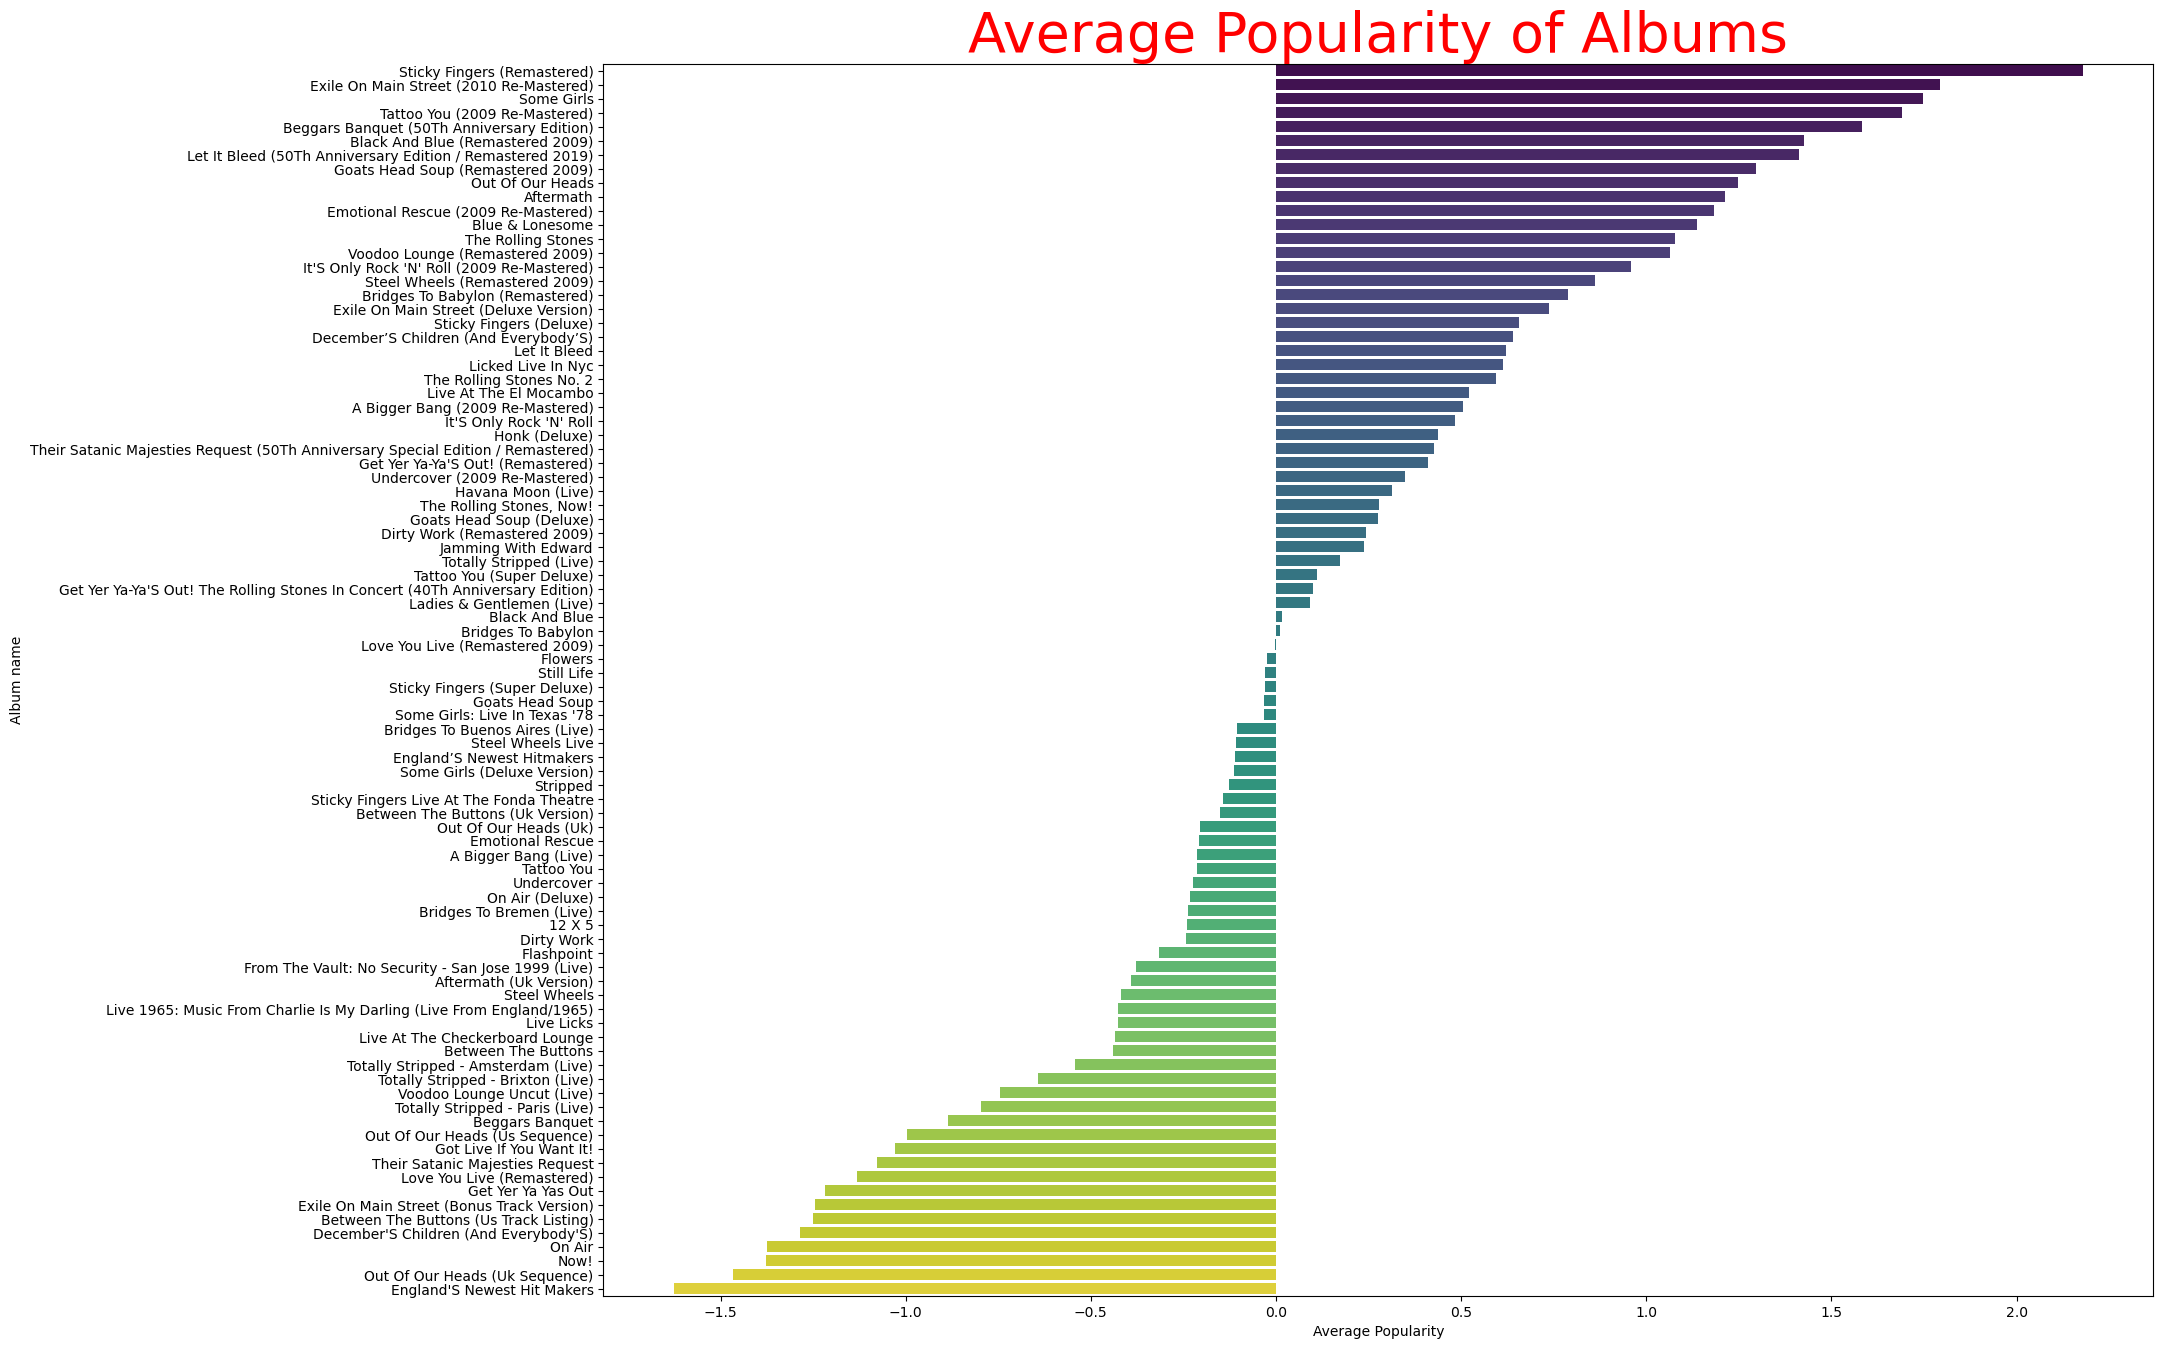

The top two albums recommended based on the number of popular songs are : 
album
Sticky Fingers (Remastered)                2.178938
Exile On Main Street (2010 Re-Mastered)    1.792693
Name: popularity, dtype: float64


In [20]:
# Plotting the average popularity of albums
plt.figure(figsize=(20,16))
sns.barplot(x=popular_ablums.values, y=popular_ablums.index, palette = 'viridis')
plt.title('Average Popularity of Albums', fontsize=40, color = 'red', loc = 'center')
plt.xlabel('Average Popularity')
plt.ylabel('Album name')
plt.show()

# Identify the two albums with the most popular songs
top_albums = popular_ablums.head(2)
print(f"The top two albums recommended based on the number of popular songs are : \n{top_albums}")


## 2. Conduct exploratory data analysis to delve into various features of songs, aiming to identify patterns

<Figure size 1200x1000 with 0 Axes>

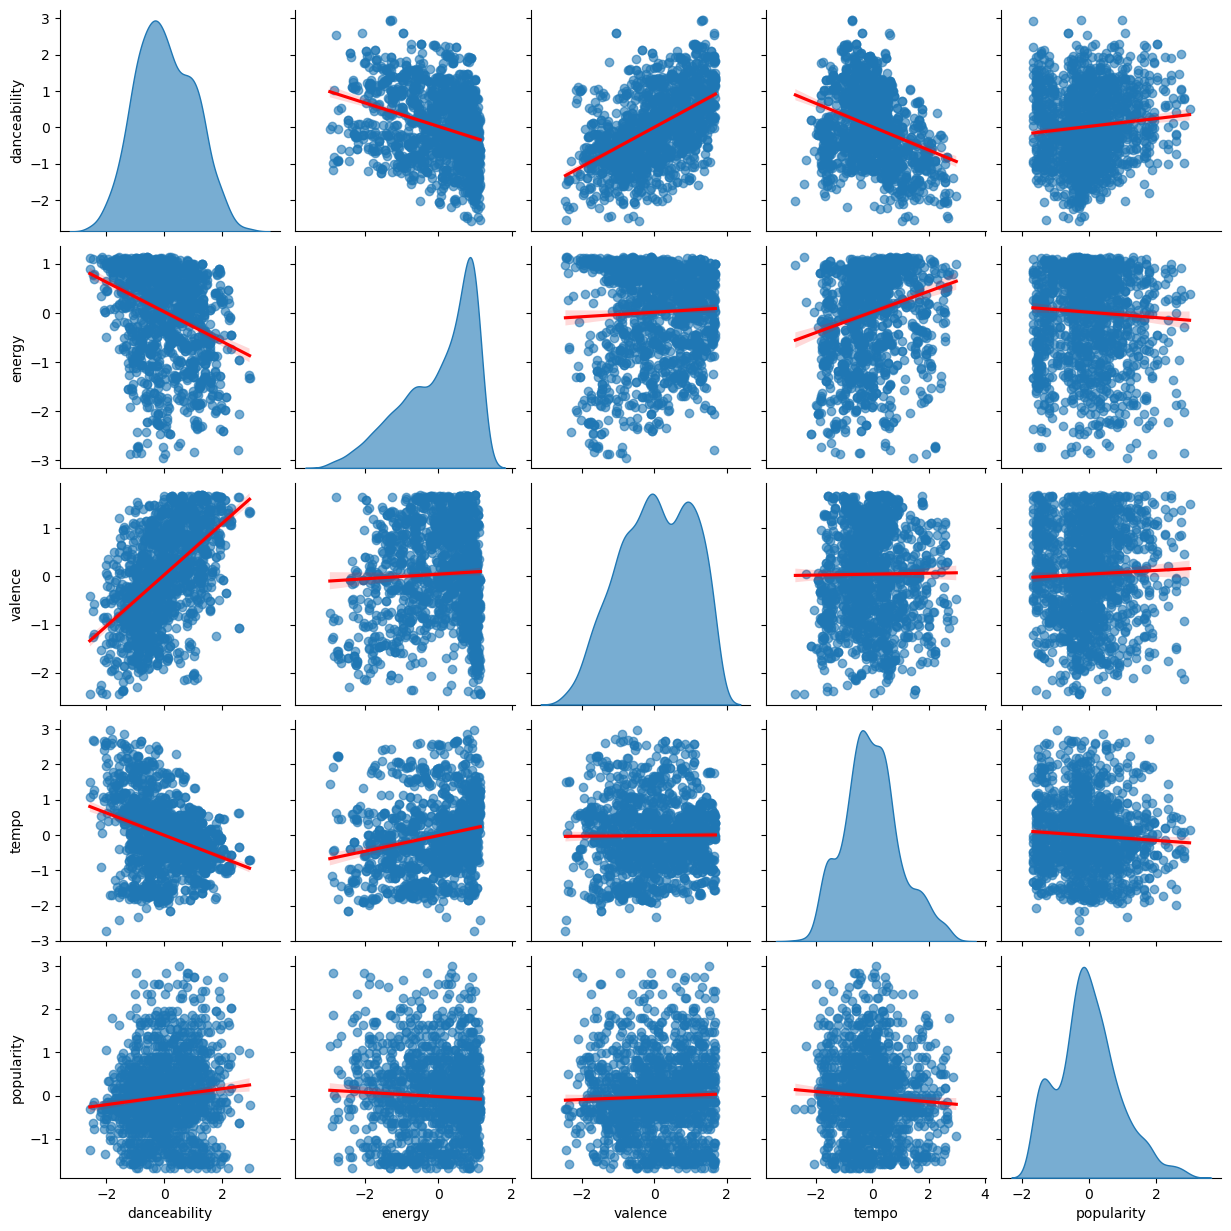

In [21]:
# Pairplot to visualize relationships between features
plt.figure(figsize=(12,10))
sns.pairplot(df[['danceability','energy', 'valence', 'tempo', 'popularity']], kind='reg', 
             plot_kws={'line_kws': {'color': 'red'}, 'scatter_kws': {'alpha': 0.6}},
            diag_kind='kde', diag_kws={'shade': True, 'alpha': 0.6})

In [22]:
# Correlation matrix
# Select only the numeric columns for the correlation matrix
numeric_cols = [
    'acousticness', 'danceability', 'energy', 'instrumentalness', 
    'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 
    'popularity', 'duration_ms'
]

# Ensure all selected columns are in the dataframe
df_numeric = df[numeric_cols].copy()

# Check for non-numeric values in numeric columns and convert them if necessary
for col in df_numeric.columns:
    df_numeric[col] = pd.to_numeric(df_numeric[col], errors='coerce')

# Drop rows with NaN values that may have resulted from conversion issues
df_numeric = df_numeric.dropna()

# Generate the correlation matrix
corr_matrix = df_numeric.corr()

# Print the correlation matrix
print("---------------Correlation Matrix------------------------")
corr_matrix

---------------Correlation Matrix------------------------


,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
acousticness,1.000000,0.081612,-0.363625,0.046211,-0.112355,-0.200142,-0.119025,-0.173219,-0.115866,0.105469,0.106276
danceability,0.081612,1.000000,-0.312081,-0.024561,-0.510922,-0.297296,-0.342865,-0.318273,0.535234,0.099812,-0.233560
energy,-0.363625,-0.312081,1.000000,0.122720,0.503274,0.694790,0.479397,0.215697,0.046665,-0.051860,0.156284
instrumentalness,0.046211,-0.024561,0.122720,1.000000,0.001311,0.050053,-0.015671,0.029341,0.127868,0.011834,-0.138705
liveness,-0.112355,-0.510922,0.503274,0.001311,1.000000,0.340895,0.429659,0.113494,-0.341884,-0.180020,0.313684
loudness,-0.200142,-0.297296,0.694790,0.050053,0.340895,1.000000,0.292776,0.112611,-0.088728,0.167845,0.236534
speechiness,-0.119025,-0.342865,0.479397,-0.015671,0.429659,0.292776,1.000000,0.247941,-0.385720,-0.135269,0.132173
tempo,-0.173219,-0.318273,0.215697,0.029341,0.113494,0.112611,0.247941,1.000000,0.009591,-0.063744,-0.038236
valence,-0.115866,0.535234,0.046665,0.127868,-0.341884,-0.088728,-0.385720,0.009591,1.000000,0.035501,-0.302516
popularity,0.105469,0.099812,-0.051860,0.011834,-0.180020,0.167845,-0.135269,-0.063744,0.035501,1.000000,0.116511


Text(0.5, 1.0, 'Correlation Matrix of Song Features')

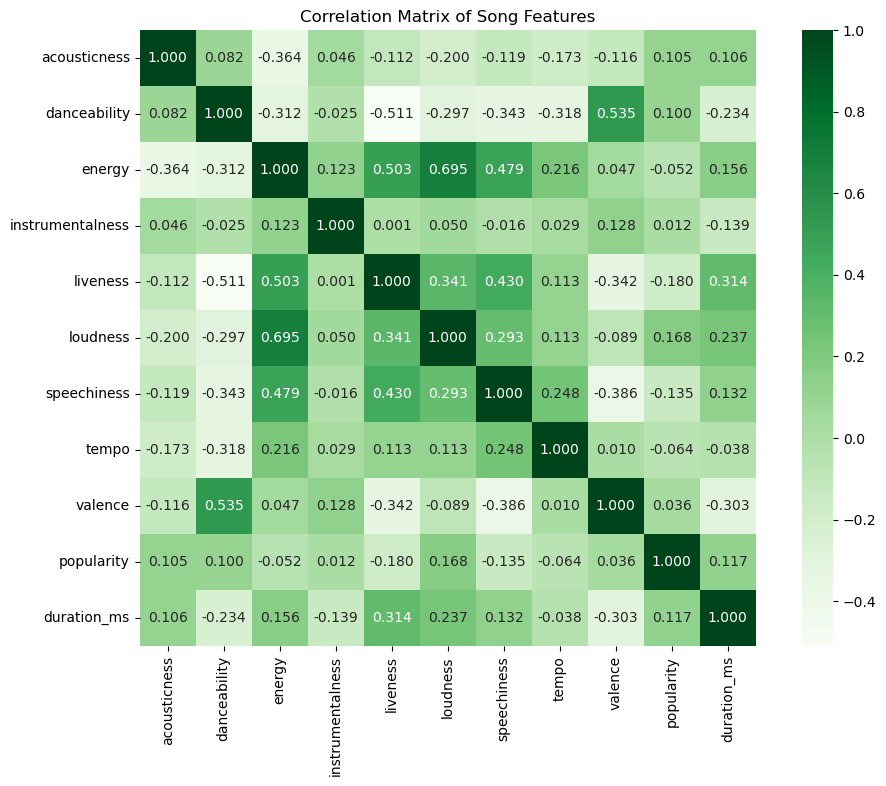

In [23]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='Greens', square=True)
plt.title('Correlation Matrix of Song Features')

# 3. Examine the relationship between a song's popularity and various factors, exploring how this correlation has evolved

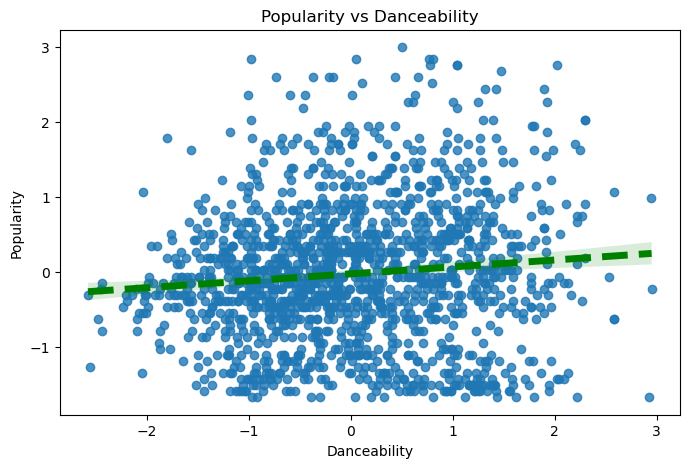

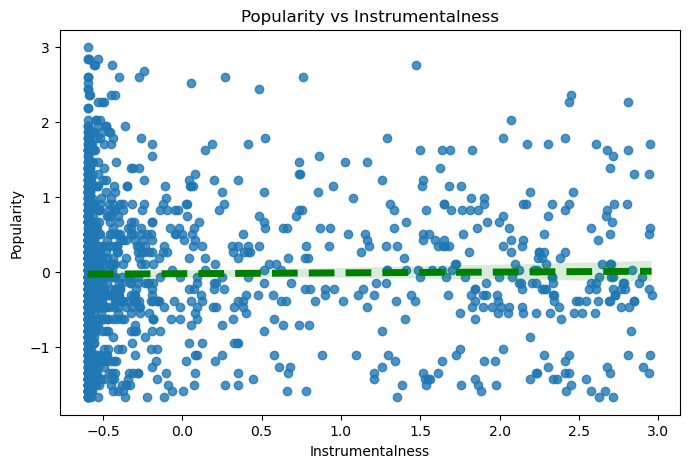

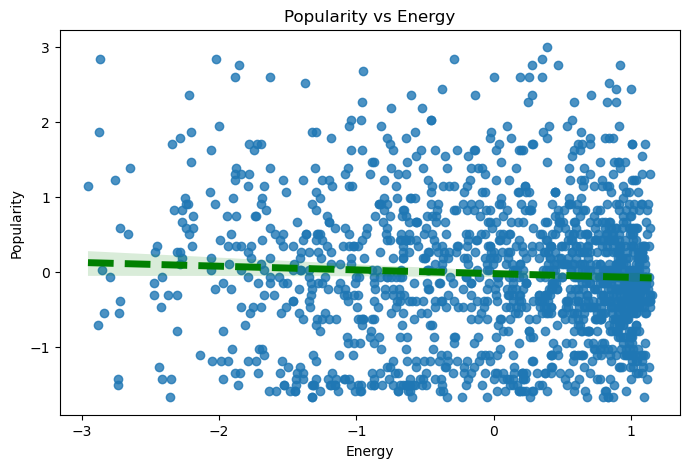

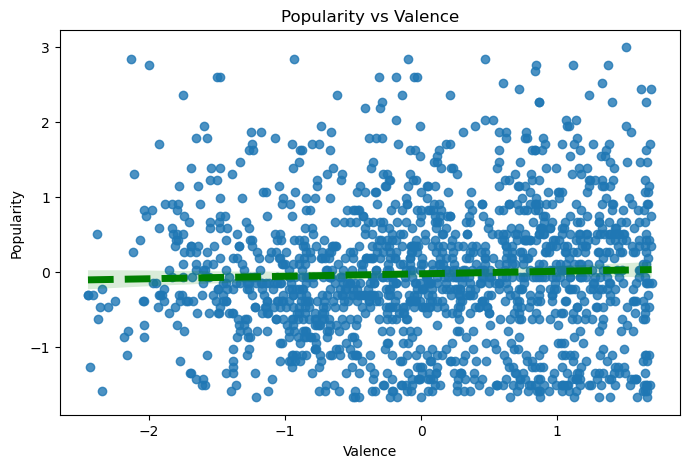

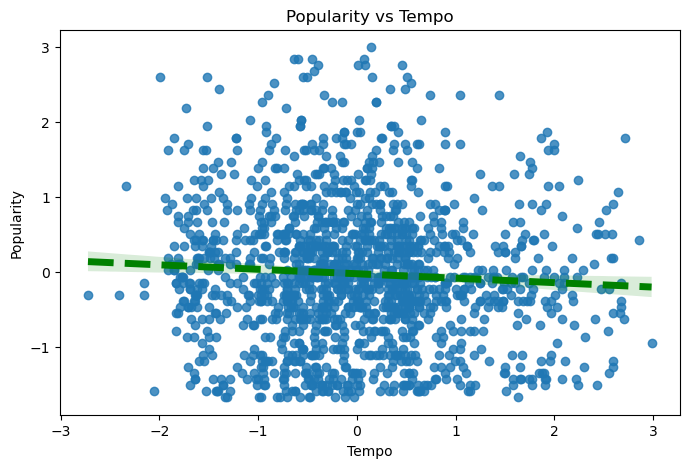

In [24]:
# Scatter plot of popularity vs other features
for feature in ['danceability', 'instrumentalness', 'energy', 'valence', 'tempo']:
    plt.figure(figsize=(8,5))
    sns.regplot(data=df, x=feature, y='popularity', line_kws={'color': 'green', 'linewidth': 5, 'linestyle': '--'})
    plt.title(f'Popularity vs {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Popularity')

# 4. Provide insights on the significance of dimensionality reduction techniques.

Explained Variance: [0.30678121 0.15392027]


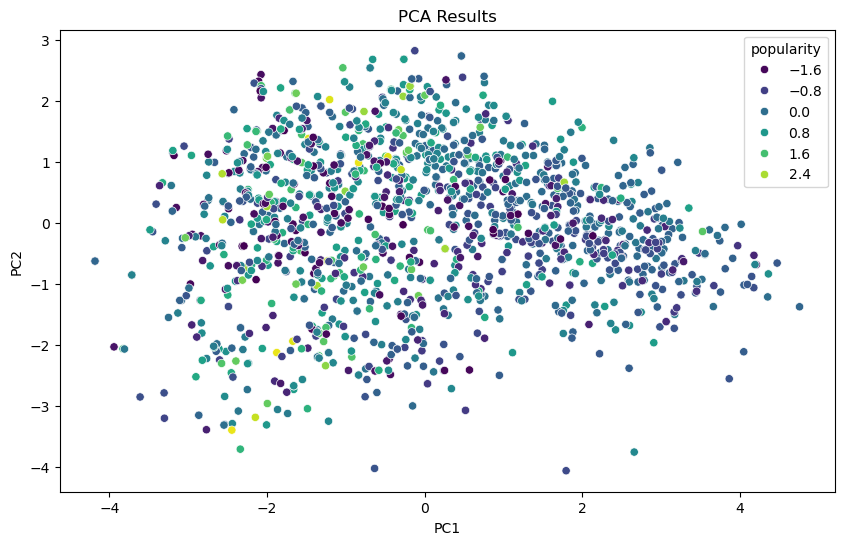

In [26]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Selecting numeric features for PCA
numeric_features = df.select_dtypes(include=['float64', 'int64']).drop(columns=['popularity', 'duration_ms'])

# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_features)

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

# Explained variance
explained_variance = pca.explained_variance_ratio_
print(f'Explained Variance: {explained_variance}')

# Adding principal components to the dataframe
df['PC1'] = principal_components[:, 0]
df['PC2'] = principal_components[:, 1]

# Plotting the PCA results
plt.figure(figsize=(10,6))
sns.scatterplot(x='PC1', y='PC2', data=df, hue='popularity', palette='viridis')
plt.title('PCA Results')
plt.show()

# Observcation
- First Principal Component (PC1): The first component explains 30.68% of the variance in the data. This suggests that a significant portion, but not the majority, of the data's variability is captured by this single dimension.

- Second Principal Component (PC2): The second component explains an additional 15.39% of the variance. Together, the first two components explain 46.07% of the total variance in the dataset.

# Moderate Explained Variance by PC1 and PC2:

- Moderate Explained Variance by PC1 and PC2:

- The first principal component captures 30.68% of the variance, which is substantial but not dominant. This indicates that while there is some strong underlying structure, the data is not overwhelmingly dominated by a single factor.

- The second principal component adds 15.39% to the explained variance. Together, they capture about 46.07% of the variance, which is less than half of the total variance. This suggests that the dataset has multiple factors contributing to its variability, each relatively important.

- Cumulative Explained Variance:The cumulative explained variance of 46.07% by the first two components implies that while these components capture a significant portion of the information, more components would be necessary to capture the majority of the variance. This might suggest that the data is complex and multifaceted.

#  <span style="color:lightgreen"> Step 4: Perform cluster analysis </span> 

# a. Identify the right number of clusters

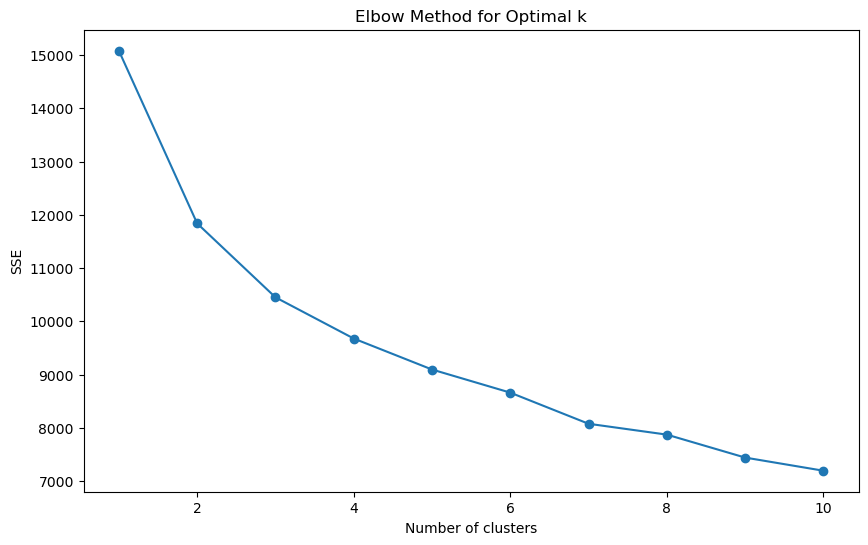

In [27]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

# B .Use appropriate clustering algorithm

In [28]:
# Select numeric columns for clustering
numeric_cols = [
    'acousticness', 'danceability', 'energy', 'instrumentalness', 
    'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 
    'popularity', 'duration_ms'
]
df_numeric = df[numeric_cols]

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

In [29]:
# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(df_scaled)

# C. Define each cluster based on the features

In [30]:
# Aggregate by cluster and calculate the mean of numeric features
cluster_summary = df.groupby('cluster')[numeric_cols].mean()

# Display cluster summary
cluster_summary

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
cluster,,,,,,,,,,,
0,-0.291367,0.572144,0.252495,0.304961,-0.504799,0.222570,-0.386350,-0.128698,0.861351,0.210863,-0.327301
1,0.658509,0.293250,-1.175302,-0.296077,-0.606540,-0.818434,-0.488755,-0.365010,-0.257212,-0.030203,-0.193955
2,-0.297948,-0.743437,0.733825,-0.069041,0.954956,0.543294,0.553829,0.383305,-0.540854,-0.260850,0.249459


# Handle Non-Numeric Columns Separately

In [31]:
# Get the most common album for each cluster
most_common_album = df.groupby('cluster')['album'].agg(lambda x: x.mode()[0])

# Combine numeric summary with the most common album
cluster_summary['most_common_album'] = most_common_album

# Display combined cluster summary
cluster_summary

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,most_common_album
cluster,,,,,,,,,,,,
0,-0.291367,0.572144,0.252495,0.304961,-0.504799,0.222570,-0.386350,-0.128698,0.861351,0.210863,-0.327301,Honk (Deluxe)
1,0.658509,0.293250,-1.175302,-0.296077,-0.606540,-0.818434,-0.488755,-0.365010,-0.257212,-0.030203,-0.193955,Aftermath (Uk Version)
2,-0.297948,-0.743437,0.733825,-0.069041,0.954956,0.543294,0.553829,0.383305,-0.540854,-0.260850,0.249459,Voodoo Lounge Uncut (Live)


# Cluster Visualization

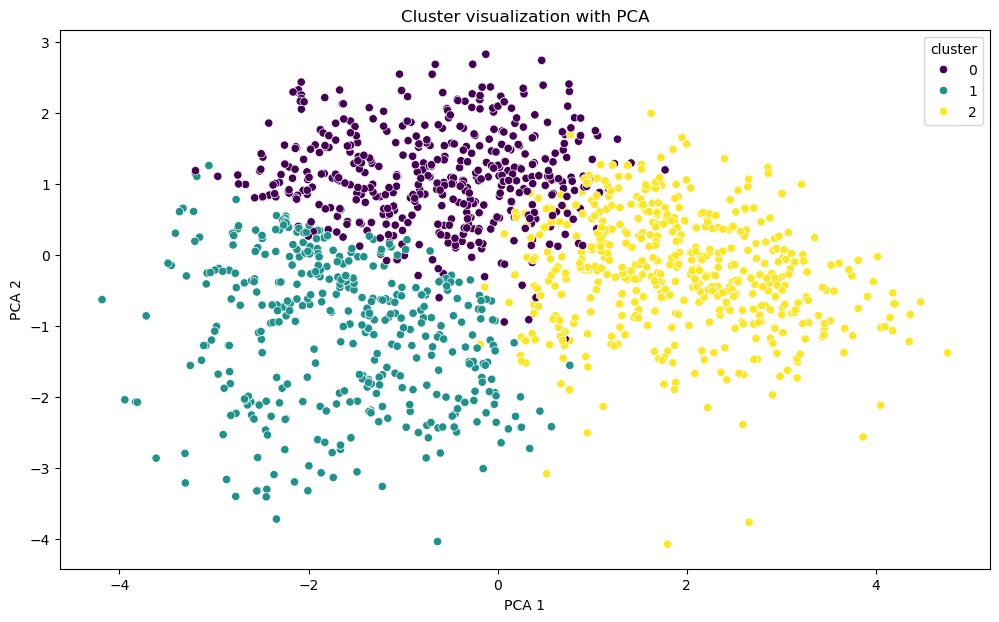

In [39]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data = df, x = 'PC1', y = 'PC2', hue = 'cluster', palette = 'viridis')
plt.title("Cluster visualization with PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

# Key Insights:

- Popular Albums:
"Honk" , "Aftermath (Uk Version)" and "Voodoo Lounge Uncut (Live)" were identified as albums with the most popular songs, making them strong candidates for recommendation.


# Conclusion:
The project successfully utilized exploratory data analysis and clustering techniques to create meaningful cohorts of songs. The insights gained from the analysis can help improve song recommendations on Spotify by understanding the key features that define song popularity and clustering similar songs together. The ablove clusters can be used to recommend the songs to the user based on the cluster similarities